In [66]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fedesoriano/heart-failure-prediction")

pd.set_option('display.max_rows', None)

print("Path to dataset files:", path)

Path to dataset files: /Users/gatiengenevois/.cache/kagglehub/datasets/fedesoriano/heart-failure-prediction/versions/1


In [68]:
# load dataset
df = pd.read_csv(path + "/heart.csv")
print("Dataset shape:", df.shape)
print("Dataset 5 first rows:")
print(df.head())
print("Dataset description:")
print(df.describe())
print("Dataset values count:")
print(df.count())

Dataset shape: (918, 12)
Dataset 5 first rows:
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
Dataset description:
              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   

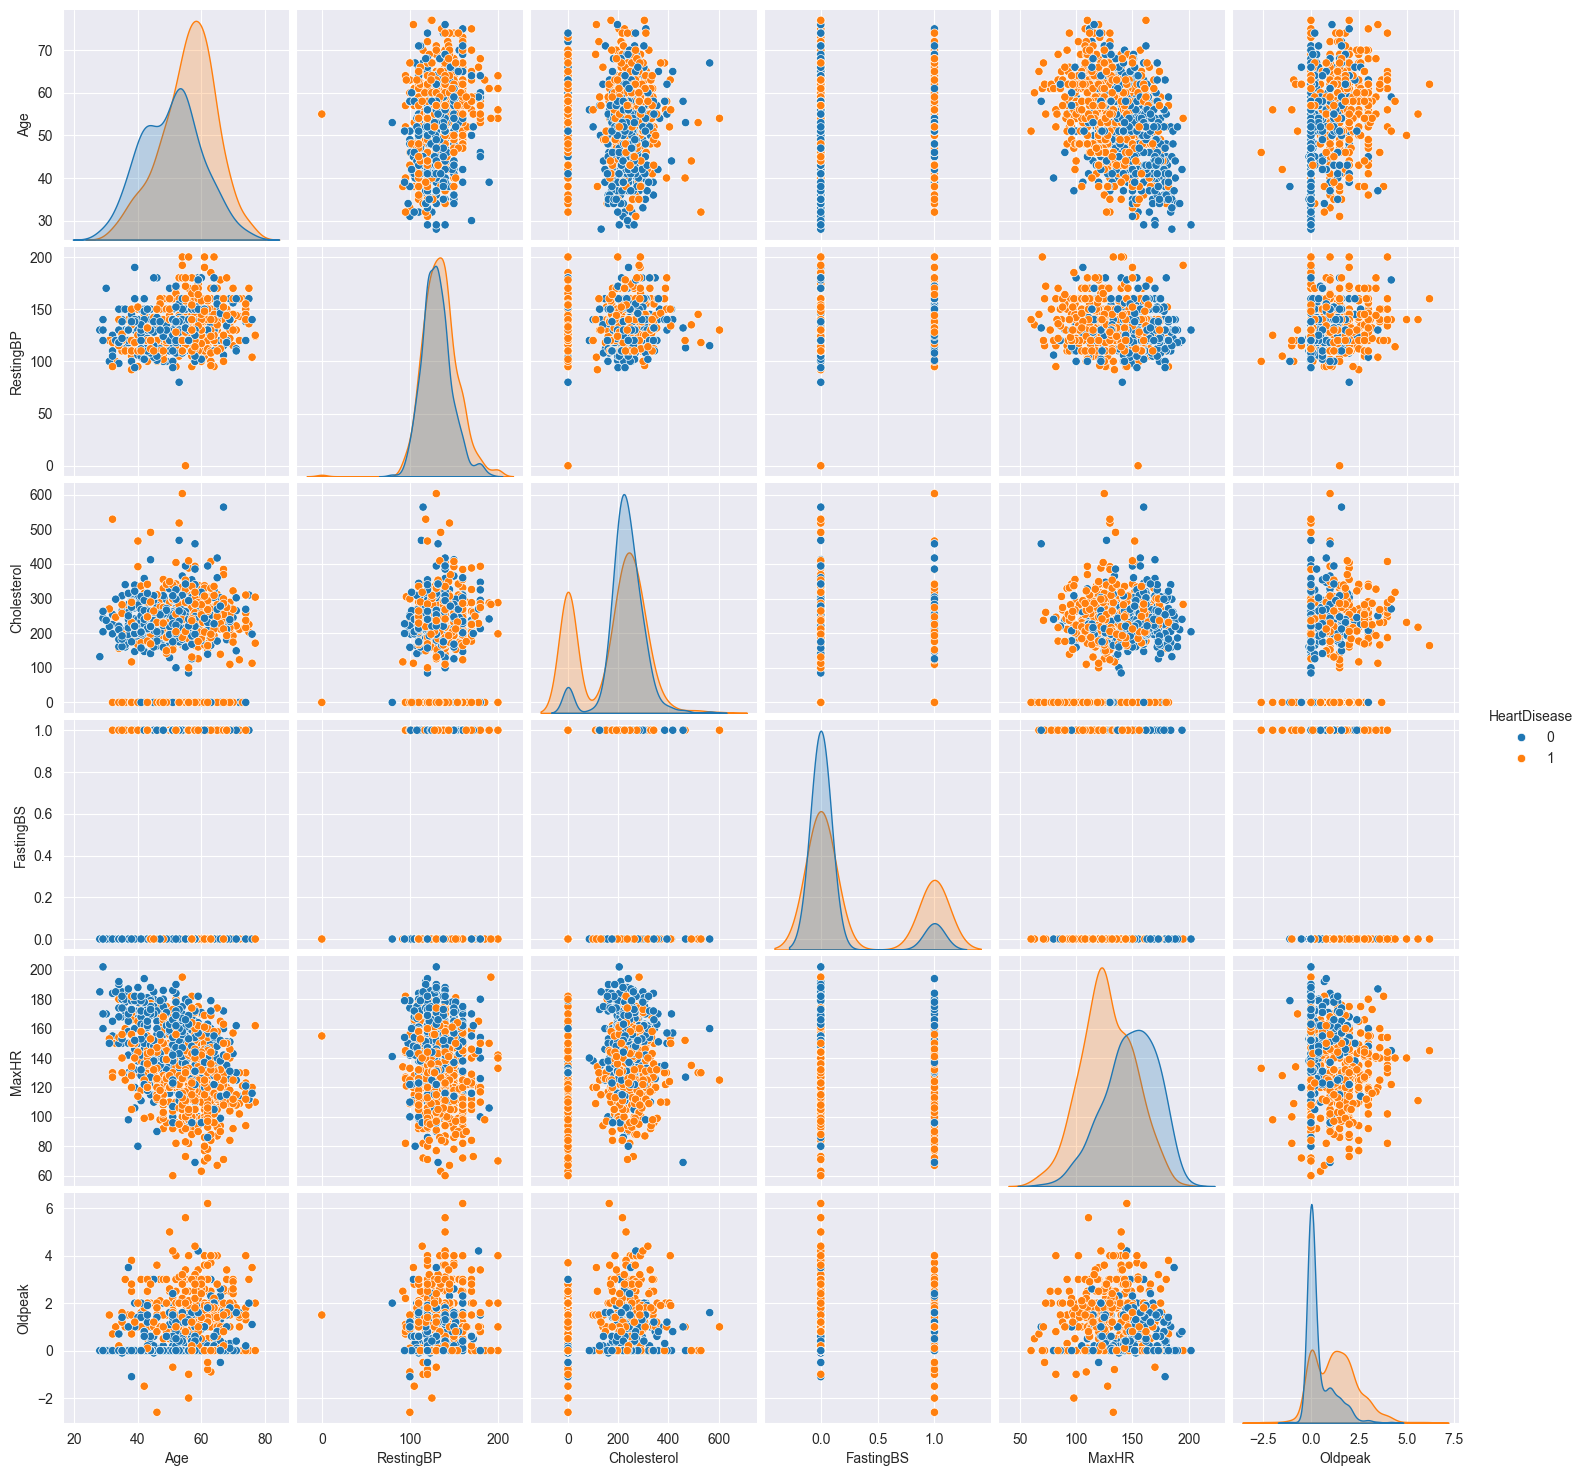

In [69]:
"""
Comprendre les caractéristiques du jeu de
données, leur distribution et leur relation entre elles ainsi qu'avec la variable cible.
L'objectif est de détecter les corrélations pertinentes entre les variables explicatives et
d'identifier les facteurs qui influencent le plus la sortie. Une analyse bien détaillée et
pertinente est attendue de vous.
"""

sns.pairplot(data=df, hue="HeartDisease")
plt.show()

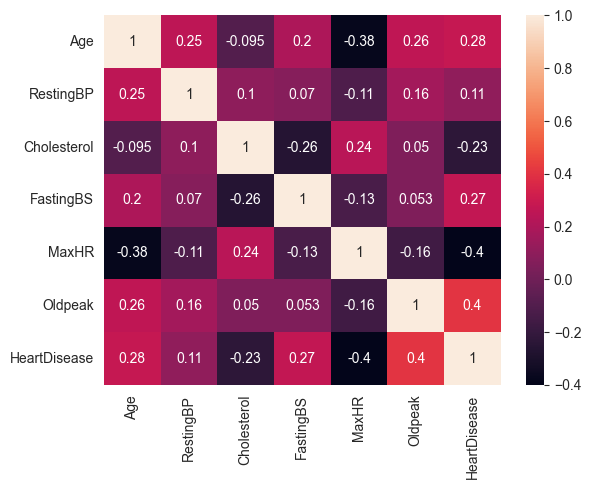

In [70]:
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

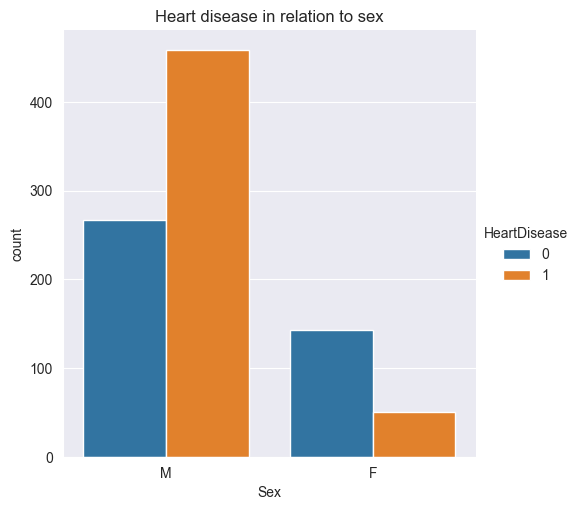

Proportion of men with heart disease: 0.6317241379310344 %
Proportion of women with heart disease: 0.25906735751295334 %


In [71]:
sns.catplot(data=df, x="Sex", hue="HeartDisease", kind="count")
plt.title("Heart disease in relation to sex")
plt.show()
man_with_heart_disease = df[(df['Sex'] == "M") & (df['HeartDisease'] == 1)]
man_without_heart_disease = df[(df['Sex'] == "M") & (df['HeartDisease'] == 0)]
woman_with_heart_disease = df[(df['Sex'] == "F") & (df['HeartDisease'] == 1)]
woman_without_heart_disease = df[(df['Sex'] == "F") & (df['HeartDisease'] == 0)]
print(f"Proportion of men with heart disease: {len(man_with_heart_disease) / (len(man_without_heart_disease) + len(man_with_heart_disease))} %")
print(f"Proportion of women with heart disease: {len(woman_with_heart_disease) / (len(woman_without_heart_disease) + len(woman_with_heart_disease))} %")

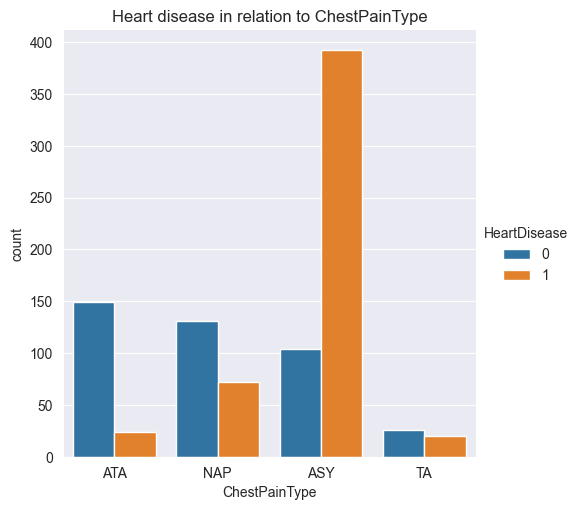

In [72]:
sns.catplot(data=df, x="ChestPainType", hue="HeartDisease", kind="count")
plt.title("Heart disease in relation to ChestPainType")
plt.show()

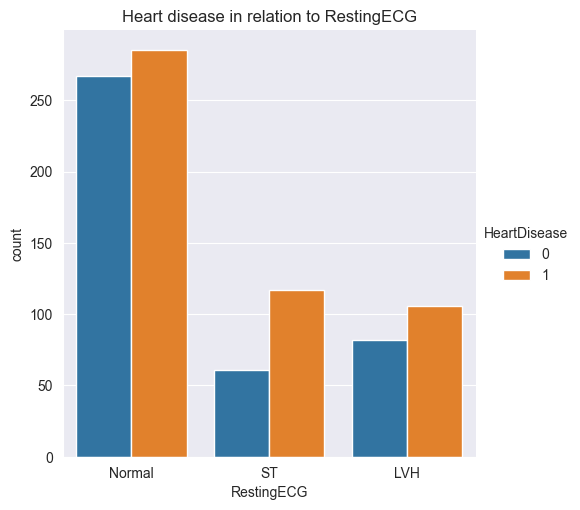

In [73]:
sns.catplot(df, x="RestingECG", hue="HeartDisease", kind="count")
plt.title("Heart disease in relation to RestingECG")
plt.show()

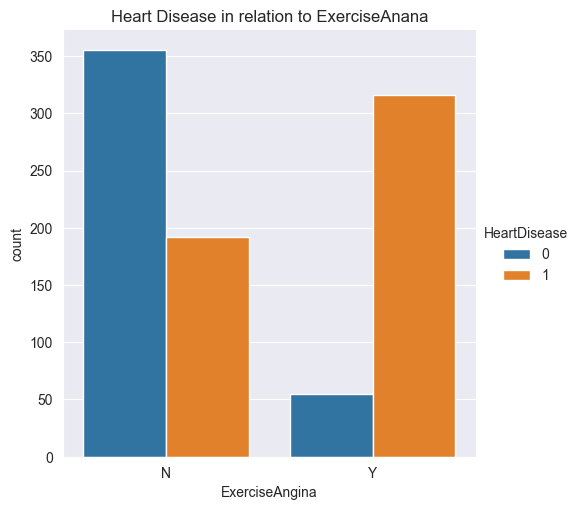

In [74]:
sns.catplot(df, x="ExerciseAngina", hue="HeartDisease", kind="count")
plt.title("Heart Disease in relation to ExerciseAnana")
plt.show()

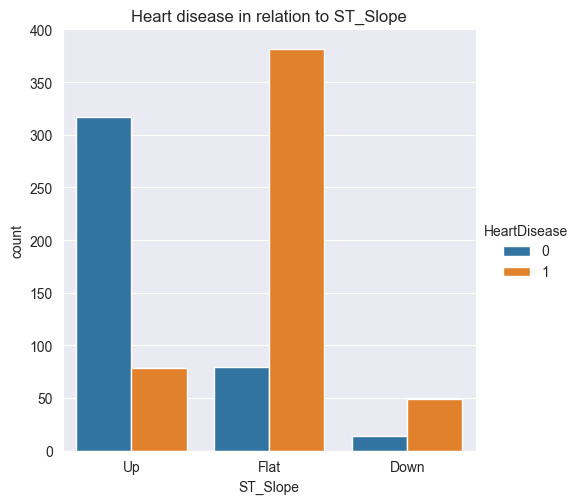

In [75]:
sns.catplot(df, x="ST_Slope", hue="HeartDisease", kind="count")
plt.title("Heart disease in relation to ST_Slope")
plt.show()

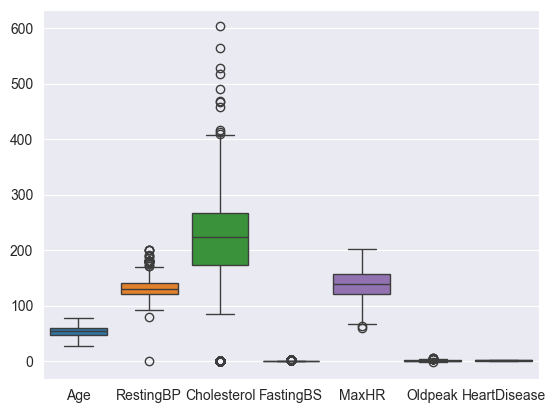

In [76]:
sns.boxplot(data=df)
plt.show()

In [77]:
"""
Préparation des données : Effectuer les transformations nécessaires pour rendre les
données utilisables dans les modèles (par exemple, gestion des valeurs manquantes,
transformation des variables catégorielles, gestion des valeurs aberrantes).
"""

# manage missing values
print(f"Nb lines before dropna {df.shape[0]}")
df = df.dropna()
print(f"Nb lines after dropna {df.shape[0]}") # all lines have complete data

Nb lines before dropna 918
Nb lines after dropna 918


Outliers for Age (1):
829    136.809368
Name: Age, dtype: float64


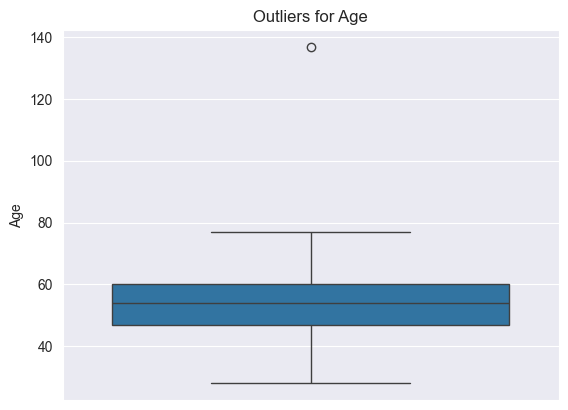

Outliers for RestingBP (28):
109    190.0
123    180.0
189    180.0
190    180.0
241    200.0
274    180.0
275    180.0
278    180.0
314     80.0
365    200.0
372    185.0
399    200.0
411    180.0
423    180.0
449      0.0
475    178.0
550    172.0
585    180.0
592    190.0
673    174.0
702    178.0
725    180.0
732    200.0
759    192.0
774    178.0
780    180.0
855    180.0
880    172.0
Name: RestingBP, dtype: float64


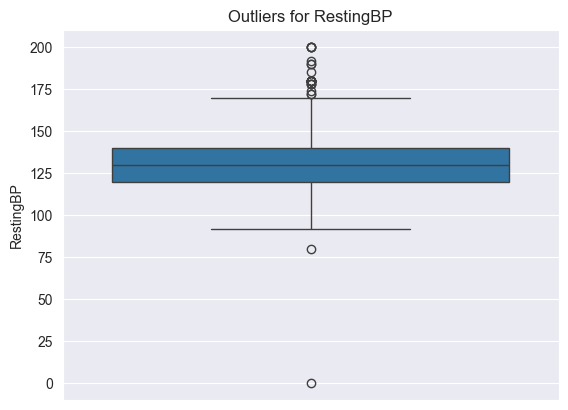

Outliers for Cholesterol (183):
28     468.0
30     518.0
69     412.0
76     529.0
103    466.0
149    603.0
250    491.0
293      0.0
294      0.0
295      0.0
296      0.0
297      0.0
298      0.0
299      0.0
300      0.0
301      0.0
302      0.0
303      0.0
304      0.0
305      0.0
306      0.0
307      0.0
308      0.0
309      0.0
310      0.0
311      0.0
312      0.0
313      0.0
314      0.0
315      0.0
316      0.0
317      0.0
318      0.0
319      0.0
320      0.0
321      0.0
322      0.0
323      0.0
324      0.0
325      0.0
326      0.0
327      0.0
328      0.0
329      0.0
330      0.0
331      0.0
332      0.0
333      0.0
334      0.0
335      0.0
336      0.0
337      0.0
338      0.0
339      0.0
340      0.0
341      0.0
342      0.0
343      0.0
344      0.0
345      0.0
346      0.0
347      0.0
348      0.0
349      0.0
350      0.0
351      0.0
352      0.0
353      0.0
354      0.0
355      0.0
356      0.0
357      0.0
358      0.0
359      0.0
360   

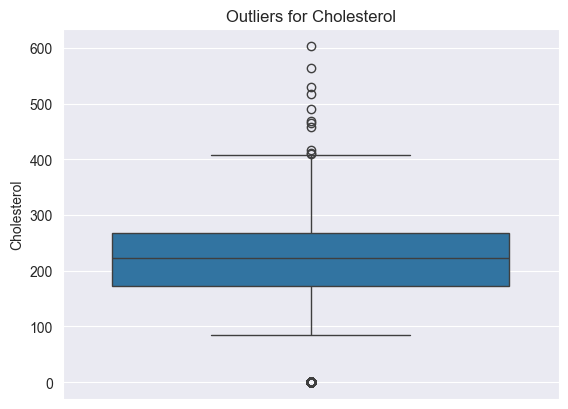

Outliers for FastingBS (215):
36       1.000000
38       1.000000
52       1.000000
84       1.000000
86       1.000000
97       1.000000
103      1.000000
105      1.000000
112      1.000000
117      1.000000
120      1.000000
128      1.000000
149      1.000000
155      1.000000
160      1.000000
165      1.000000
185      1.000000
187      1.000000
210      1.000000
224      1.000000
242      1.000000
247      1.000000
294      1.000000
295      1.000000
296      1.000000
297      1.000000
298      1.000000
299      1.000000
300      1.000000
302      1.000000
303      1.000000
304      1.000000
305      1.000000
306      1.000000
308      1.000000
309      1.000000
311      1.000000
312      1.000000
313      1.000000
315      1.000000
316      1.000000
317      1.000000
318      1.000000
319      1.000000
320      1.000000
321      1.000000
322      1.000000
323      1.000000
324      1.000000
325      1.000000
327      1.000000
328      1.000000
329      1.000000
330      1.00000

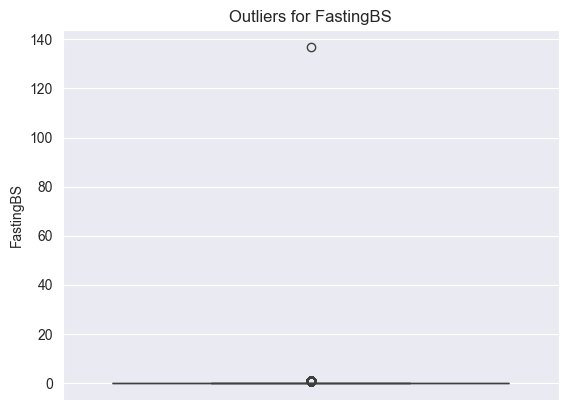

Outliers for Oldpeak (17):
68       4.000000
166      5.000000
324     -2.600000
500      4.000000
521      4.000000
537      4.000000
559      4.000000
624      4.000000
702      4.200000
732      4.000000
771      5.600000
775      3.800000
791      4.200000
829    136.809368
850      6.200000
900      4.400000
908      4.000000
Name: Oldpeak, dtype: float64


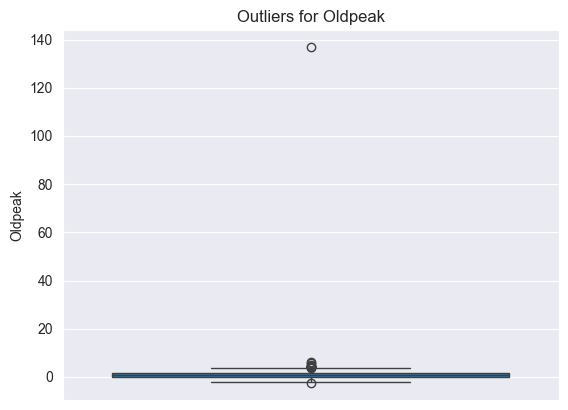

Outliers for HeartDisease (1):
829    136.809368
Name: HeartDisease, dtype: float64


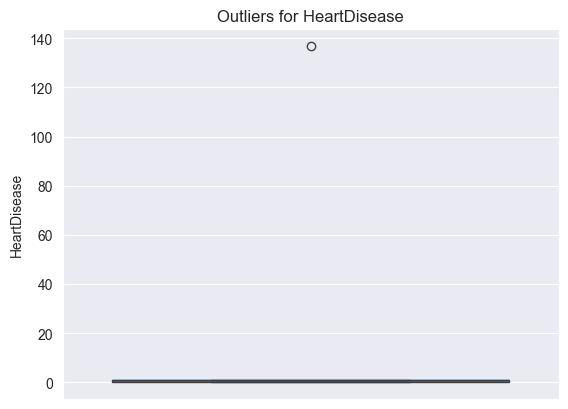

In [168]:
# manage outliers
def find_outliers(column_name : str)-> pd.DataFrame:
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    pd = df[(df[column_name]>(Q3 + 1.5*IQR)) | (df[column_name]<(Q1 - 1.5*IQR))]
    return pd if not pd.empty else None

for col in df:
    col_type = df[col].dtypes
    if col_type == np.int64 or col_type == np.float64:
        outliers = find_outliers(col)
        if outliers is not None:
            print(f"Outliers for {col} ({len(outliers)}):")
            print(outliers[col])
            sns.boxplot(data=df[col])
            plt.title(f"Outliers for {col}")
            plt.show()


In [167]:
# Our goal is now to replace aberrant outliers with another value

def replace_aberrant_values(column_name : str, min_threshold:int, max_threshold:int)-> pd.DataFrame:
    print(f"Mean before replacement: {df[column_name].mean()}")
    values_to_replace_mask = (df[column_name]<min_threshold) | (df[column_name]>max_threshold)
    replacement_value = df[column_name].median()
    df.loc[values_to_replace_mask, column_name] = replacement_value
    print(f"Mean after replacement: {df[column_name].mean()}")

Mean before replacement: 136.7383544315814
Mean after replacement: 140.52375748169032


In [169]:
"""
Age
RestingBP
Cholesterol
Oldpeak
"""

replace_aberrant_values("Age", 0, 122)
replace_aberrant_values("RestingBP", 90, 120)
replace_aberrant_values("Cholesterol", 0, 560)
replace_aberrant_values("Oldpeak", 0, 6)


Mean before replacement: 53.628332645089024
Mean after replacement: 53.53812636165577
Mean before replacement: 132.40393177362932
Mean after replacement: 124.87472766884531
Mean before replacement: 198.7263718607753
Mean after replacement: 197.94096881066636
Mean before replacement: 1.03639364726767
Mean after replacement: 0.9043572984749456


In [79]:
"""
Modélisation : Utiliser des algorithmes de classification pour prédire si les sujets étudiés
ont une insuffisance cardiaque. Les algorithmes à considérer sont ceux du cours,
notamment : kNN, arbre de décision, forêts aléatoires, régression logistique et réseaux de
neurones. Il faudra également choisir un algorithme de classification non vu en cours,
l’expliquer brièvement et le tester.
"""

'\nModélisation : Utiliser des algorithmes de classification pour prédire si les sujets étudiés\nont une insuffisance cardiaque. Les algorithmes à considérer sont ceux du cours,\nnotamment : kNN, arbre de décision, forêts aléatoires, régression logistique et réseaux de\nneurones. Il faudra également choisir un algorithme de classification non vu en cours,\nl’expliquer brièvement et le tester.\n'

In [80]:
"""
Évaluation : Mesurer la performance des modèles en utilisant des métriques adaptées.
"""

'\nÉvaluation : Mesurer la performance des modèles en utilisant des métriques adaptées.\n'